# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
forest_data = pd.read_csv('forestfires.csv')
forest_data

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

# Data Understanding

In [3]:
forest_data.shape

(517, 31)

In [4]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [5]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
forest_data.describe(include='all')

month  day        FFMC         DMC          DC         ISI        temp  \
count    517  517  517.000000  517.000000  517.000000  517.000000  517.000000   
unique    12    7         NaN         NaN         NaN         NaN         NaN   
top      aug  sun         NaN         NaN         NaN         NaN         NaN   
freq     184   95         NaN         NaN         NaN         NaN         NaN   
mean     NaN  NaN   90.644681  110.872340  547.940039    9.021663   18.889168   
std      NaN  NaN    5.520111   64.046482  248.066192    4.559477    5.806625   
min      NaN  NaN   18.700000    1.100000    7.900000    0.000000    2.200000   
25%      NaN  NaN   90.200000   68.600000  437.700000    6.500000   15.500000   
50%      NaN  NaN   91.600000  108.300000  664.200000    8.400000   19.300000   
75%      NaN  NaN   92.900000  142.400000  713.900000   10.800000   22.800000   
max      NaN  NaN   96.200000  291.300000  860.600000   56.100000   33.300000   

                RH        wind        rain  ...    monthfeb    monthjan  \
count   517.000000  517.000000  517.000000  ...  517.000000  517.000000   
unique         NaN         NaN         NaN  ...         NaN         NaN   
top            NaN         NaN         NaN  ...         NaN         NaN   
freq           NaN         NaN         NaN  ...         NaN         NaN   
mean     44.288201    4.017602    0.021663  ...    0.038685    0.003868   
std      16.317469    1.791653    0.295959  ...    0.193029    0.062137   
min      15.000000    0.400000    0.000000  ...    0.000000    0.000000   
25%      33.000000    2.700000    0.000000  ...    0.000000    0.000000   
50%      42.000000    4.000000    0.000000  ...    0.000000    0.000000   
75%      53.000000    4.900000    0.000000  ...    0.000000    0.000000   
max     100.000000    9.400000    6.400000  ...    1.000000    1.000000   

          monthjul    monthjun    monthmar    monthmay    monthnov  \
count   517.000000  517.000000  517.000000  517.000000  517.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.061896    0.032882    0.104449    0.003868    0.001934   
std       0.241199    0.178500    0.306138    0.062137    0.043980   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.000000    0.000000   
50%       0.000000    0.000000    0.000000    0.000000    0.000000   
75%       0.000000    0.000000    0.000000    0.000000    0.000000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

          monthoct    monthsep  size_category  
count   517.000000  517.000000            517  
unique         NaN         NaN              2  
top            NaN         NaN          small  
freq           NaN         NaN            378  
mean      0.029014    0.332689            NaN  
std       0.168007    0.471632            NaN  
min       0.000000    0.000000            NaN  
25%       0.000000    0.000000            NaN  
50%       0.000000    0.000000            NaN  
75%       0.000000    1.000000            NaN  
max       1.000000    1.000000            NaN  

[11 rows x 31 columns]

# Data Preprocessing 

In [7]:
pd.set_option('max_rows',None)

In [8]:
pd.set_option('max_columns',None)

In [9]:
forest_data

month  day  FFMC    DMC     DC   ISI  temp   RH  wind  rain     area  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2   51   6.7   0.0     0.00   
1     oct  tue  90.6   35.4  669.1   6.7  18.0   33   0.9   0.0     0.00   
2     oct  sat  90.6   43.7  686.9   6.7  14.6   33   1.3   0.0     0.00   
3     mar  fri  91.7   33.3   77.5   9.0   8.3   97   4.0   0.2     0.00   
4     mar  sun  89.3   51.3  102.2   9.6  11.4   99   1.8   0.0     0.00   
5     aug  sun  92.3   85.3  488.0  14.7  22.2   29   5.4   0.0     0.00   
6     aug  mon  92.3   88.9  495.6   8.5  24.1   27   3.1   0.0     0.00   
7     aug  mon  91.5  145.4  608.2  10.7   8.0   86   2.2   0.0     0.00   
8     sep  tue  91.0  129.5  692.6   7.0  13.1   63   5.4   0.0     0.00   
9     sep  sat  92.5   88.0  698.6   7.1  22.8   40   4.0   0.0     0.00   
10    sep  sat  92.5   88.0  698.6   7.1  17.8   51   7.2   0.0     0.00   
11    sep  sat  92.8   73.2  713.0  22.6  19.3   38   4.0   0.0     0.00   
12    aug  fri  63.5   70.8  665.3   0.8  17.0   72   6.7   0.0     0.00   
13    sep  mon  90.9  126.5  686.5   7.0  21.3   42   2.2   0.0     0.00   
14    sep  wed  92.9  133.3  699.6   9.2  26.4   21   4.5   0.0     0.00   
15    sep  fri  93.3  141.2  713.9  13.9  22.9   44   5.4   0.0     0.00   
16    mar  sat  91.7   35.8   80.8   7.8  15.1   27   5.4   0.0     0.00   
17    oct  mon  84.9   32.8  664.2   3.0  16.7   47   4.9   0.0     0.00   
18    mar  wed  89.2   27.9   70.8   6.3  15.9   35   4.0   0.0     0.00   
19    apr  sat  86.3   27.4   97.1   5.1   9.3   44   4.5   0.0     0.00   
20    sep  tue  91.0  129.5  692.6   7.0  18.3   40   2.7   0.0     0.00   
21    sep  mon  91.8   78.5  724.3   9.2  19.1   38   2.7   0.0     0.00   
22    jun  sun  94.3   96.3  200.0  56.1  21.0   44   4.5   0.0     0.00   
23    aug  sat  90.2  110.9  537.4   6.2  19.5   43   5.8   0.0     0.00   
24    aug  sat  93.5  139.4  594.2  20.3  23.7   32   5.8   0.0     0.00   
25    aug  sun  91.4  142.4  601.4  10.6  16.3   60   5.4   0.0     0.00   
26    sep  fri  92.4  117.9  668.0  12.2  19.0   34   5.8   0.0     0.00   
27    sep  mon  90.9  126.5  686.5   7.0  19.4   48   1.3   0.0     0.00   
28    sep  sat  93.4  145.4  721.4   8.1  30.2   24   2.7   0.0     0.00   
29    sep  sun  93.5  149.3  728.6   8.1  22.8   39   3.6   0.0     0.00   
30    sep  fri  94.3   85.1  692.3  15.9  25.4   24   3.6   0.0     0.00   
31    sep  mon  88.6   91.8  709.9   7.1  11.2   78   7.6   0.0     0.00   
32    sep  fri  88.6   69.7  706.8   5.8  20.6   37   1.8   0.0     0.00   
33    sep  sun  91.7   75.6  718.3   7.8  17.7   39   3.6   0.0     0.00   
34    sep  mon  91.8   78.5  724.3   9.2  21.2   32   2.7   0.0     0.00   
35    sep  tue  90.3   80.7  730.2   6.3  18.2   62   4.5   0.0     0.00   
36    oct  tue  90.6   35.4  669.1   6.7  21.7   24   4.5   0.0     0.00   
37    oct  fri  90.0   41.5  682.6   8.7  11.3   60   5.4   0.0     0.00   
38    oct  sat  90.6   43.7  686.9   6.7  17.8   27   4.0   0.0     0.00   
39    mar  tue  88.1   25.7   67.6   3.8  14.1   43   2.7   0.0     0.00   
40    jul  tue  79.5   60.6  366.7   1.5  23.3   37   3.1   0.0     0.00   
41    aug  sat  90.2   96.9  624.2   8.9  18.4   42   6.7   0.0     0.00   
42    aug  tue  94.8  108.3  647.1  17.0  16.6   54   5.4   0.0     0.00   
43    sep  sat  92.5   88.0  698.6   7.1  19.6   48   2.7   0.0     0.00   
44    sep  wed  90.1   82.9  735.7   6.2  12.9   74   4.9   0.0     0.00   
45    sep  wed  94.3   85.1  692.3  15.9  25.9   24   4.0   0.0     0.00   
46    sep  mon  90.9  126.5  686.5   7.0  14.7   70   3.6   0.0     0.00   
47    jul  mon  94.2   62.3  442.9  11.0  23.0   36   3.1   0.0     0.00   
48    mar  mon  87.2   23.9   64.7   4.1  11.8   35   1.8   0.0     0.00   
49    mar  mon  87.6   52.2  103.8   5.0  11.0   46   5.8   0.0     0.00   
50    sep  thu  92.9  137.0  706.4   9.2  20.8   17   1.3   0.0     0.00   
51    aug  sun  90.2   99.6  631.2   6.3  21.5   34 

#### Since month abd day are already maintioned as  features names and have encoded as 0 and 1 so no need of keeping the features called month and day because they also providing the same infromation  

In [10]:
forest_data.drop(labels=['month','day'],axis=1,inplace=True)

In [11]:
forest_data

FFMC    DMC     DC   ISI  temp   RH  wind  rain     area  dayfri  daymon  \
0    86.2   26.2   94.3   5.1   8.2   51   6.7   0.0     0.00       1       0   
1    90.6   35.4  669.1   6.7  18.0   33   0.9   0.0     0.00       0       0   
2    90.6   43.7  686.9   6.7  14.6   33   1.3   0.0     0.00       0       0   
3    91.7   33.3   77.5   9.0   8.3   97   4.0   0.2     0.00       1       0   
4    89.3   51.3  102.2   9.6  11.4   99   1.8   0.0     0.00       0       0   
5    92.3   85.3  488.0  14.7  22.2   29   5.4   0.0     0.00       0       0   
6    92.3   88.9  495.6   8.5  24.1   27   3.1   0.0     0.00       0       1   
7    91.5  145.4  608.2  10.7   8.0   86   2.2   0.0     0.00       0       1   
8    91.0  129.5  692.6   7.0  13.1   63   5.4   0.0     0.00       0       0   
9    92.5   88.0  698.6   7.1  22.8   40   4.0   0.0     0.00       0       0   
10   92.5   88.0  698.6   7.1  17.8   51   7.2   0.0     0.00       0       0   
11   92.8   73.2  713.0  22.6  19.3   38   4.0   0.0     0.00       0       0   
12   63.5   70.8  665.3   0.8  17.0   72   6.7   0.0     0.00       1       0   
13   90.9  126.5  686.5   7.0  21.3   42   2.2   0.0     0.00       0       1   
14   92.9  133.3  699.6   9.2  26.4   21   4.5   0.0     0.00       0       0   
15   93.3  141.2  713.9  13.9  22.9   44   5.4   0.0     0.00       1       0   
16   91.7   35.8   80.8   7.8  15.1   27   5.4   0.0     0.00       0       0   
17   84.9   32.8  664.2   3.0  16.7   47   4.9   0.0     0.00       0       1   
18   89.2   27.9   70.8   6.3  15.9   35   4.0   0.0     0.00       0       0   
19   86.3   27.4   97.1   5.1   9.3   44   4.5   0.0     0.00       0       0   
20   91.0  129.5  692.6   7.0  18.3   40   2.7   0.0     0.00       0       0   
21   91.8   78.5  724.3   9.2  19.1   38   2.7   0.0     0.00       0       1   
22   94.3   96.3  200.0  56.1  21.0   44   4.5   0.0     0.00       0       0   
23   90.2  110.9  537.4   6.2  19.5   43   5.8   0.0     0.00       0       0   
24   93.5  139.4  594.2  20.3  23.7   32   5.8   0.0     0.00       0       0   
25   91.4  142.4  601.4  10.6  16.3   60   5.4   0.0     0.00       0       0   
26   92.4  117.9  668.0  12.2  19.0   34   5.8   0.0     0.00       1       0   
27   90.9  126.5  686.5   7.0  19.4   48   1.3   0.0     0.00       0       1   
28   93.4  145.4  721.4   8.1  30.2   24   2.7   0.0     0.00       0       0   
29   93.5  149.3  728.6   8.1  22.8   39   3.6   0.0     0.00       0       0   
30   94.3   85.1  692.3  15.9  25.4   24   3.6   0.0     0.00       1       0   
31   88.6   91.8  709.9   7.1  11.2   78   7.6   0.0     0.00       0       1   
32   88.6   69.7  706.8   5.8  20.6   37   1.8   0.0     0.00       1       0   
33   91.7   75.6  718.3   7.8  17.7   39   3.6   0.0     0.00       0       0   
34   91.8   78.5  724.3   9.2  21.2   32   2.7   0.0     0.00       0       1   
35   90.3   80.7  730.2   6.3  18.2   62   4.5   0.0     0.00       0       0   
36   90.6   35.4  669.1   6.7  21.7   24   4.5   0.0     0.00       0       0   
37   90.0   41.5  682.6   8.7  11.3   60   5.4   0.0     0.00       1       0   
38   90.6   43.7  686.9   6.7  17.8   27   4.0   0.0     0.00       0       0   
39   88.1   25.7   67.6   3.8  14.1   43   2.7   0.0     0.00       0       0   
40   79.5   60.6  366.7   1.5  23.3   37   3.1   0.0     0.00       0       0   
41   90.2   96.9  624.2   8.9  18.4   42   6.7   0.0     0.00       0       0   
42   94.8  108.3  647.1  17.0  16.6   54   5.4   0.0     0.00       0       0   
43   92.5   88.0  698.6   7.1  19.6   48   2.7   0.0     0.00       0       0   
44   90.1   82.9  735.7   6.2  12.9   74   4.9   0.0     0.00       0       0   
45   94.3   85.1  692.3  15.9  25.9   24   4.0   0.0     0.00       0       0   
46   90.9  126.5  686.5   7.0  14.7   70   3.6   0.0     0.00       0       1   
47   94.2   62.3  442.9  11.0  23.0   36   3.1   0.0     0.00       0       1   
48   87.2   23.9   64.7   4.1  11.8 

In [12]:
forest_data.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [13]:
le = LabelEncoder()

In [14]:
forest_data['size_category']  = le.fit_transform(forest_data['size_category'])

In [15]:
forest_data

FFMC    DMC     DC   ISI  temp   RH  wind  rain     area  dayfri  daymon  \
0    86.2   26.2   94.3   5.1   8.2   51   6.7   0.0     0.00       1       0   
1    90.6   35.4  669.1   6.7  18.0   33   0.9   0.0     0.00       0       0   
2    90.6   43.7  686.9   6.7  14.6   33   1.3   0.0     0.00       0       0   
3    91.7   33.3   77.5   9.0   8.3   97   4.0   0.2     0.00       1       0   
4    89.3   51.3  102.2   9.6  11.4   99   1.8   0.0     0.00       0       0   
5    92.3   85.3  488.0  14.7  22.2   29   5.4   0.0     0.00       0       0   
6    92.3   88.9  495.6   8.5  24.1   27   3.1   0.0     0.00       0       1   
7    91.5  145.4  608.2  10.7   8.0   86   2.2   0.0     0.00       0       1   
8    91.0  129.5  692.6   7.0  13.1   63   5.4   0.0     0.00       0       0   
9    92.5   88.0  698.6   7.1  22.8   40   4.0   0.0     0.00       0       0   
10   92.5   88.0  698.6   7.1  17.8   51   7.2   0.0     0.00       0       0   
11   92.8   73.2  713.0  22.6  19.3   38   4.0   0.0     0.00       0       0   
12   63.5   70.8  665.3   0.8  17.0   72   6.7   0.0     0.00       1       0   
13   90.9  126.5  686.5   7.0  21.3   42   2.2   0.0     0.00       0       1   
14   92.9  133.3  699.6   9.2  26.4   21   4.5   0.0     0.00       0       0   
15   93.3  141.2  713.9  13.9  22.9   44   5.4   0.0     0.00       1       0   
16   91.7   35.8   80.8   7.8  15.1   27   5.4   0.0     0.00       0       0   
17   84.9   32.8  664.2   3.0  16.7   47   4.9   0.0     0.00       0       1   
18   89.2   27.9   70.8   6.3  15.9   35   4.0   0.0     0.00       0       0   
19   86.3   27.4   97.1   5.1   9.3   44   4.5   0.0     0.00       0       0   
20   91.0  129.5  692.6   7.0  18.3   40   2.7   0.0     0.00       0       0   
21   91.8   78.5  724.3   9.2  19.1   38   2.7   0.0     0.00       0       1   
22   94.3   96.3  200.0  56.1  21.0   44   4.5   0.0     0.00       0       0   
23   90.2  110.9  537.4   6.2  19.5   43   5.8   0.0     0.00       0       0   
24   93.5  139.4  594.2  20.3  23.7   32   5.8   0.0     0.00       0       0   
25   91.4  142.4  601.4  10.6  16.3   60   5.4   0.0     0.00       0       0   
26   92.4  117.9  668.0  12.2  19.0   34   5.8   0.0     0.00       1       0   
27   90.9  126.5  686.5   7.0  19.4   48   1.3   0.0     0.00       0       1   
28   93.4  145.4  721.4   8.1  30.2   24   2.7   0.0     0.00       0       0   
29   93.5  149.3  728.6   8.1  22.8   39   3.6   0.0     0.00       0       0   
30   94.3   85.1  692.3  15.9  25.4   24   3.6   0.0     0.00       1       0   
31   88.6   91.8  709.9   7.1  11.2   78   7.6   0.0     0.00       0       1   
32   88.6   69.7  706.8   5.8  20.6   37   1.8   0.0     0.00       1       0   
33   91.7   75.6  718.3   7.8  17.7   39   3.6   0.0     0.00       0       0   
34   91.8   78.5  724.3   9.2  21.2   32   2.7   0.0     0.00       0       1   
35   90.3   80.7  730.2   6.3  18.2   62   4.5   0.0     0.00       0       0   
36   90.6   35.4  669.1   6.7  21.7   24   4.5   0.0     0.00       0       0   
37   90.0   41.5  682.6   8.7  11.3   60   5.4   0.0     0.00       1       0   
38   90.6   43.7  686.9   6.7  17.8   27   4.0   0.0     0.00       0       0   
39   88.1   25.7   67.6   3.8  14.1   43   2.7   0.0     0.00       0       0   
40   79.5   60.6  366.7   1.5  23.3   37   3.1   0.0     0.00       0       0   
41   90.2   96.9  624.2   8.9  18.4   42   6.7   0.0     0.00       0       0   
42   94.8  108.3  647.1  17.0  16.6   54   5.4   0.0     0.00       0       0   
43   92.5   88.0  698.6   7.1  19.6   48   2.7   0.0     0.00       0       0   
44   90.1   82.9  735.7   6.2  12.9   74   4.9   0.0     0.00       0       0   
45   94.3   85.1  692.3  15.9  25.9   24   4.0   0.0     0.00       0       0   
46   90.9  126.5  686.5   7.0  14.7   70   3.6   0.0     0.00       0       1   
47   94.2   62.3  442.9  11.0  23.0   36   3.1   0.0     0.00       0       1   
48   87.2   23.9   64.7   4.1  11.8 

In [16]:
forest_data.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int32
dtype: object

# Model Building Without Scaling

In [17]:
X = forest_data.drop(labels='size_category',axis=1) 
y = forest_data[['size_category']]

In [18]:
X.shape,y.shape

((517, 28), (517, 1))

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15,stratify=y,test_size=0.20)

In [20]:
X_train.shape,y_train.shape

((413, 28), (413, 1))

In [21]:
X_test.shape,y_test.shape

((104, 28), (104, 1))

# Model Training | Model Testing | Model Evaluation

## kernel = rbf

In [22]:
svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(X_train,y_train)

SVC()

### For Train Data 

In [23]:
y_train_pred = svc_classifier.predict(X_train)
y_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
print('Accuracy Score      :', round(accuracy_score(y_train,y_train_pred),4))
print('Recall Score        :', round(recall_score(y_train,y_train_pred),4))
print('Precision Score     :', round(precision_score(y_train,y_train_pred),4))
print('Confusion Matrix    :\n', confusion_matrix(y_train,y_train_pred))

Accuracy Score      : 0.7554
Recall Score        : 1.0
Precision Score     : 0.7494
Confusion Matrix    :
 [[ 10 101]
 [  0 302]]


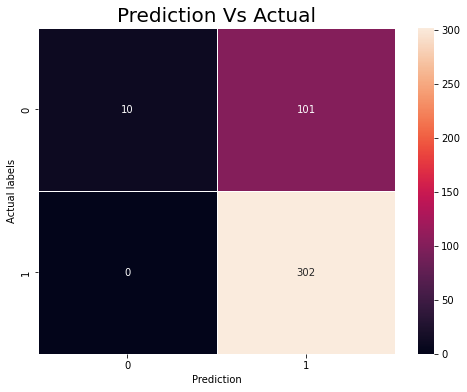

In [25]:
plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_train,y_train_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g'
            
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)
plt.show()

### For Test Data 

In [26]:
y_test_pred = svc_classifier.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
print('Accuracy Score      :', round(accuracy_score(y_test,y_test_pred),4))
print('Recall Score        :', round(recall_score(y_test,y_test_pred),4))
print('Precision Score     :', round(precision_score(y_test,y_test_pred),4))
print('Confusion Matrix    :\n', confusion_matrix(y_test,y_test_pred))

Accuracy Score      : 0.7404
Recall Score        : 1.0
Precision Score     : 0.7379
Confusion Matrix    :
 [[ 1 27]
 [ 0 76]]


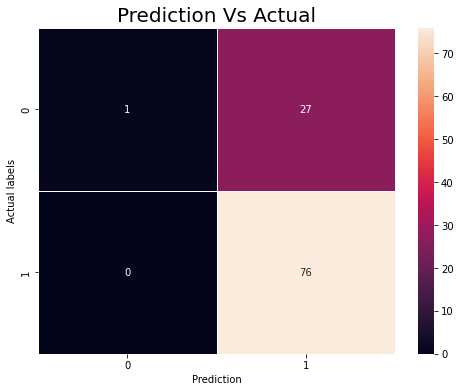

In [28]:
plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_test_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g'
            
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)
plt.show()

## kernel = polinomial

In [29]:
svc_classifier = SVC(kernel='poly')
svc_classifier.fit(X_train,y_train)

SVC(kernel='poly')

### For Train Data 

In [30]:
y_train_pred = svc_classifier.predict(X_train)
y_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
print('Accuracy Score      :', round(accuracy_score(y_train,y_train_pred),4))
print('Recall Score        :', round(recall_score(y_train,y_train_pred),4))
print('Precision Score     :', round(precision_score(y_train,y_train_pred),4))
print('Confusion Matrix    :\n', confusion_matrix(y_train,y_train_pred))

Accuracy Score      : 0.7676
Recall Score        : 1.0
Precision Score     : 0.7588
Confusion Matrix    :
 [[ 15  96]
 [  0 302]]


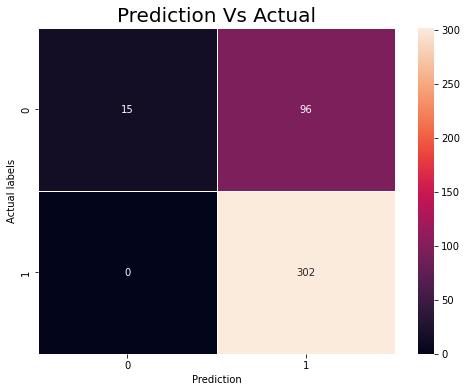

In [32]:
plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_train,y_train_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g'
            
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)
plt.show()

### For Test Data 

In [33]:
y_test_pred = svc_classifier.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
print('Accuracy Score      :', round(accuracy_score(y_test,y_test_pred),4))
print('Recall Score        :', round(recall_score(y_test,y_test_pred),4))
print('Precision Score     :', round(precision_score(y_test,y_test_pred),4))
print('Confusion Matrix    :\n', confusion_matrix(y_test,y_test_pred))

Accuracy Score      : 0.7788
Recall Score        : 1.0
Precision Score     : 0.7677
Confusion Matrix    :
 [[ 5 23]
 [ 0 76]]


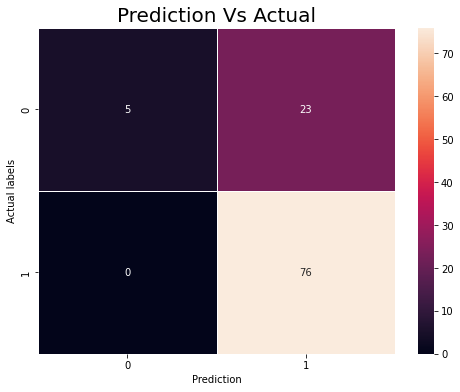

In [35]:
plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_test_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g'
            
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)
plt.show()

## kernel = linear

In [36]:
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)

SVC(kernel='linear')

### For Train Data 

In [37]:
y_train_pred = svc_classifier.predict(X_train)
y_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [38]:
print('Accuracy Score      :', round(accuracy_score(y_train,y_train_pred),4))
print('Recall Score        :', round(recall_score(y_train,y_train_pred),4))
print('Precision Score     :', round(precision_score(y_train,y_train_pred),4))
print('Confusion Matrix    :\n', confusion_matrix(y_train,y_train_pred))

Accuracy Score      : 1.0
Recall Score        : 1.0
Precision Score     : 1.0
Confusion Matrix    :
 [[111   0]
 [  0 302]]


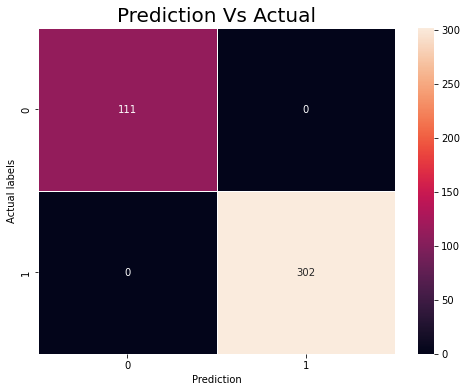

In [39]:
plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_train,y_train_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g'
            
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)
plt.show()

### For Test Data 

In [40]:
y_test_pred = svc_classifier.predict(X_test)
y_test_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [41]:
print('Accuracy Score      :', round(accuracy_score(y_test,y_test_pred),4))
print('Recall Score        :', round(recall_score(y_test,y_test_pred),4))
print('Precision Score     :', round(precision_score(y_test,y_test_pred),4))
print('Confusion Matrix    :\n', confusion_matrix(y_test,y_test_pred))

Accuracy Score      : 0.9904
Recall Score        : 0.9868
Precision Score     : 1.0
Confusion Matrix    :
 [[28  0]
 [ 1 75]]


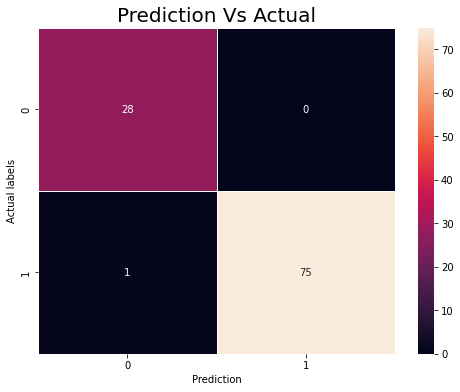

In [42]:
plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_test_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g'
            
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)
plt.show()

In [43]:
df = {'Train Accuracy Score':[0.7554,0.7676,1.0],'Test Accuracy Score':[0.7404,0.7788,0.9904]}

In [44]:
df = pd.DataFrame(data=df,index=['rbf','poly','linear'])

In [45]:
df

Train Accuracy Score  Test Accuracy Score
rbf                   0.7554               0.7404
poly                  0.7676               0.7788
linear                1.0000               0.9904

### Accuracy of the model with  kernel = linear and default gama and C values it has 100% train accuracy and 99.04% test accuracy. So no need of scaling and tweaking of parameters are needed.

## Best Model

In [46]:
svc_classifier_forest_data = SVC(kernel='linear')
svc_classifier_forest_data.fit(X_train,y_train)

SVC(kernel='linear')

In [47]:
y_pred = svc_classifier_forest_data.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [48]:
accuracy_score(y_test,y_pred)

0.9903846153846154

# Model Deployment

In [49]:
from pickle import dump

In [50]:
dump(svc_classifier_forest_data,open('svc_classifier_forest_data','wb'))

In [51]:
from pickle import load

In [52]:
load(open('svc_classifier_forest_data','rb'))

SVC(kernel='linear')

In [53]:
y_pred = svc_classifier_forest_data.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

# ===========================THE END==========================